# SGD Regression

SGD(Stochastic Gradient Descent) Regression

Stochastic Gradient Descent (SGD) 은 convex 형태의 loss 함수를 통한 최적화 문제에 매우 효율적인 접근방법입니다. SGD는 큰 규모이면서 희소한 형태의 데이터(예로, 10^5 이상의 Feature를 가진 10^5 개 이상의 학습 데이터)에서도 좋은 성과를 나타냅니다. 

장점:
* 효율적이며, 구현이 쉬움


단점:
* 효율적 학습을 위해 hyperparameters 에 대한 tunning 이 필요
* Feature scaling 에 민감


SGDRegression 은 loss 함수 및 penalty 설정에 따라 다른 Linear 모델이 수행됩니다.


loss
* loss="squared_loss": Ordinary least squares, default
* loss="huber": Huber loss for robust regression,
* loss="epsilon_insensitive": linear Support Vector Regression.

penalty
* ‘l2’, ‘l1’, or ‘elasticnet’
* The penalty (aka regularization term) to be used. Defaults to ‘l2’ which is the standard regularizer for linear SVM models. ‘l1’ and ‘elasticnet’ might bring sparsity to the model (feature selection) not achievable with ‘l2’.

l1_ratio
* The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1. Defaults to 0.15.


In [1]:
# 경고 메시지 출력 끄기
import warnings 
warnings.filterwarnings(action='ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import IPython

import sys

rseed = 22
import random
random.seed(rseed)

import numpy as np
np.random.seed(rseed)
np.set_printoptions(precision=3)
np.set_printoptions(formatter={'float_kind': "{:.3f}".format})

import pandas as pd
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.5f}'.format

import sklearn

print(f"python ver={sys.version}")
print(f"pandas ver={pd.__version__}")
print(f"numpy ver={np.__version__}")
print(f"sklearn ver={sklearn.__version__}")

python ver=3.8.9 (default, Jun 12 2021, 23:47:44) 
[Clang 12.0.5 (clang-1205.0.22.9)]
pandas ver=1.2.4
numpy ver=1.19.5
sklearn ver=0.24.2


data shape: xs=(1000, 1), ys=(1000,)
train shape: train_xs=(700, 1), train_ys=(700,)
test shape: test_xs=(300, 1), test_ys=(300,)


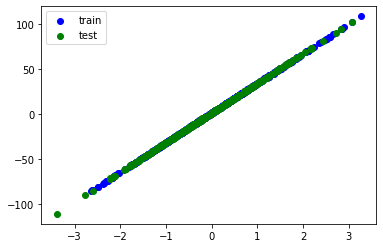


model=SGDRegressor()
coefficient=[32.876]
intercept=[0.990]
r_square=0.99992


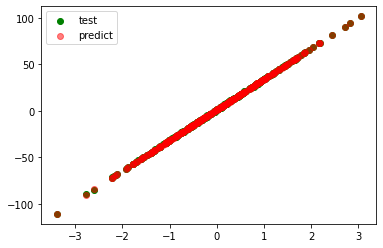

In [4]:
from sklearn import datasets, model_selection, linear_model, metrics

# 데이터
n_samples = 1000
xs, ys = datasets.make_regression(
    n_samples=n_samples, # 데이터 수
    n_features=1, # X feature 수
    bias=1.0, # Y 절편
    noise=0.3, # X 변수들에 더해지는 잡음의 표준 편차
    random_state=rseed) # 난수 발생용 Seed 값
print(f"data shape: xs={xs.shape}, ys={ys.shape}")
train_xs, test_xs, train_ys, test_ys = model_selection.train_test_split(
    xs, ys, test_size=0.3, shuffle=True, random_state=rseed)
print(f"train shape: train_xs={train_xs.shape}, train_ys={train_ys.shape}")
print(f"test shape: test_xs={test_xs.shape}, test_ys={test_ys.shape}")
plt.scatter(train_xs, train_ys, label='train', c='b')
plt.scatter(test_xs, test_ys, label='test', c='g')
plt.legend()
plt.show()

# 모델
models = [
    linear_model.SGDRegressor()
]

for model in models:
    # 학습
    print(f"\nmodel={model}")
    model.fit(train_xs, train_ys)

    # 평가
    pred_ys = model.predict(test_xs)

    # 선형 회귀 모델링을 통해 얻은 coefficient, intercept 입니다.
    print(f"coefficient={model.coef_}")
    print(f"intercept={model.intercept_}")
    
    # 평가: 테스트 데이터에 대해서 R2 값을 구합니다. R2 는 1.0 에 가까울 수록 선형 회귀 모델이 데이터를 잘 설명하고 있다는 것입니다.
    r_square = metrics.r2_score(test_ys, pred_ys)
    print(f"r_square={r_square:.5f}")
    
    plt.scatter(test_xs, test_ys, label='test', c='g')
    plt.scatter(test_xs, pred_ys, label='predict', c='r', alpha=0.5)
    plt.legend()
    plt.show()